In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[video](https://www.youtube.com/watch?v=EMcNjJ6Gj8w&list=PL5-da3qGB5ID7YYAqireYEew2mWVvgmj6&index=25)

In [18]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/titanic.csv'
data = pd.read_csv(url)

In [19]:
data.shape

(891, 12)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

One of the reasons people use Decision Trees is because of their high interpretability, and to interpret them you have to visualize them. 

Two functions in sklearn

- plot_tree (uses Matplotlib)
- export_text (doesn't require any external libraries)

In [29]:
from sklearn.tree import plot_tree, export_text

In [21]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
data['Sex'] = data.Sex.map({'male' : 0, 'female' : 1})
data['Survived'] = data.Survived.map({0 : 'deceased', 1 : 'Survived'})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,deceased,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,deceased,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.dropna(subset = ['Pclass','Sex','Age','SibSp','Parch','Fare','Survived'], inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [24]:
data.shape

(714, 12)

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)

In [43]:
y = data.Survived
X = data[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [44]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [45]:
classes = clf.classes_
classes

array(['Survived', 'deceased'], dtype=object)

In [46]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare']

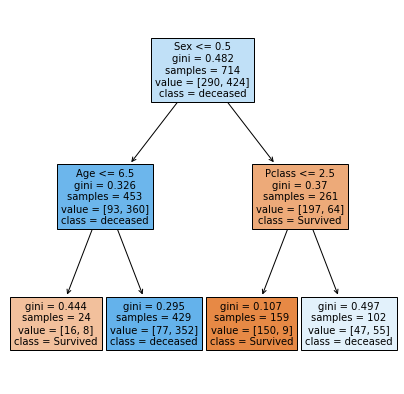

In [48]:
plt.figure(figsize=(7,7))
plot_tree(clf, feature_names = features, class_names=classes, filled=True, fontsize=10)
plt.show()

In [52]:
print(export_text(clf, feature_names=features,show_weights=True))

|--- Sex <= 0.50
|   |--- Age <= 6.50
|   |   |--- weights: [16.00, 8.00] class: Survived
|   |--- Age >  6.50
|   |   |--- weights: [77.00, 352.00] class: deceased
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- weights: [150.00, 9.00] class: Survived
|   |--- Pclass >  2.50
|   |   |--- weights: [47.00, 55.00] class: deceased



In [50]:
export_text?